# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

## **Importing the Libraries**

In [98]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load and unzip the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'
out_directory = '/content/drive/MyDrive/Facial_emotion_images'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [11]:
picture_size = 48
folder_path = "Facial_emotion_images/"

In [110]:
import os.path
folder_path = "D:\\GitHub\\amitprakash07\\snowflake\\data\\data_science_mit\\Facial_emotion_images\\"
out_directory = 'D:\\GitHub\\amitprakash07\\snowflake\\temp\\sandbox\\Facial_emotion_images'
print(folder_path)

D:\GitHub\amitprakash07\snowflake\data\data_science_mit\Facial_emotion_images\


## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

In [99]:
from tensorflow.keras import utils as tf_utils

In [162]:
def show_images(folder_path, expression):
    plt.figure(figsize= (8,8))
    for i in range(1, 10, 1):
        plt.subplot(3, 3, i)

        img = tf_utils.load_img(folder_path + "train/" + expression + "/" +
                      os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
        plt.imshow(img)

    plt.show()

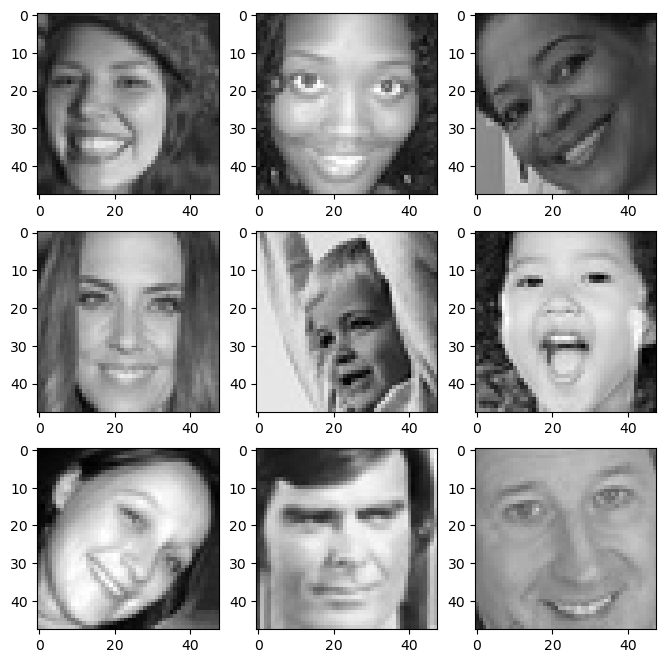

In [88]:
expression = 'happy'
show_images(folder_path, expression)

**Observations and Insights:__**

### **Sad**

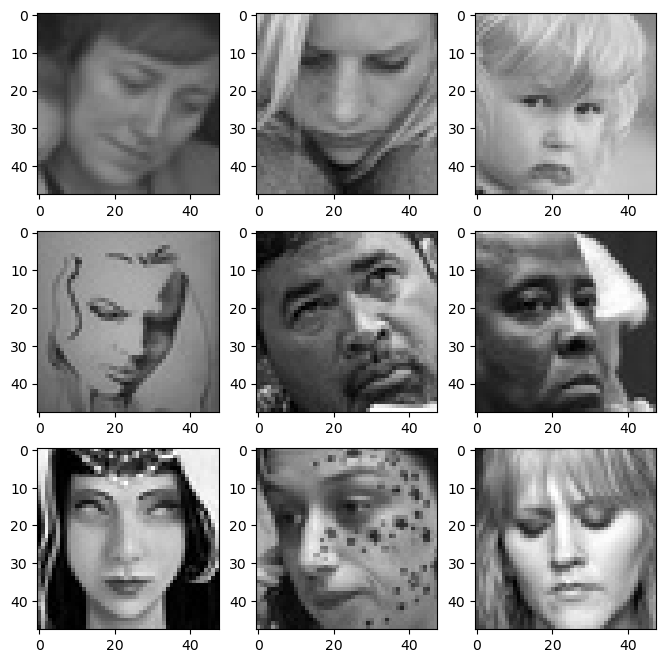

In [89]:
expression = 'sad'
show_images(folder_path, expression)

**Observations and Insights:__**

### **Neutral**

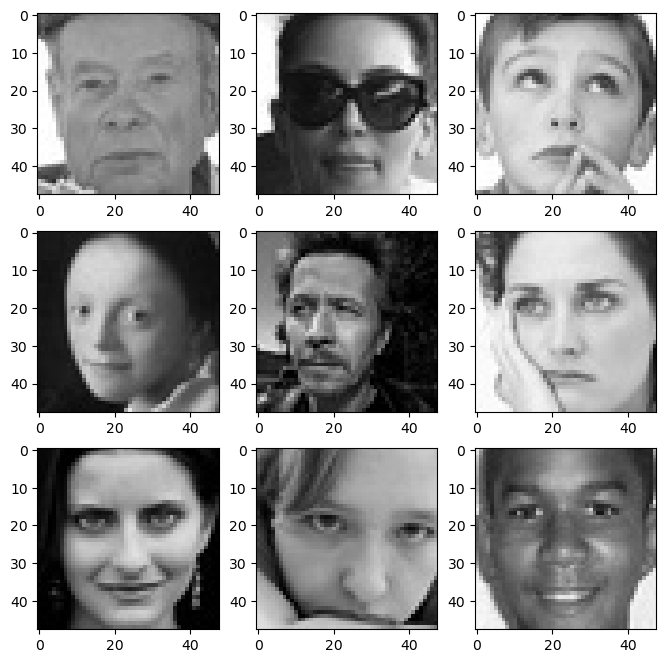

In [22]:
expression = 'neutral'
show_images(folder_path, expression)

**Observations and Insights:__**

### **Surprised**

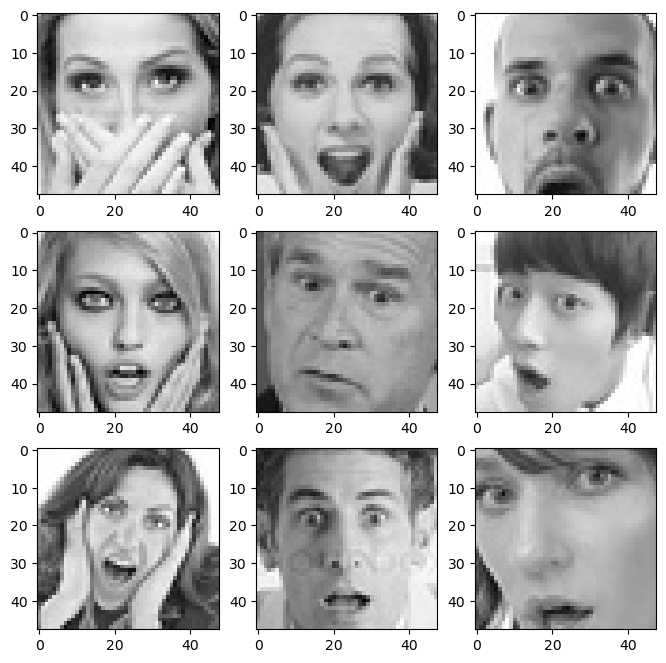

In [23]:
expression = 'surprise'
show_images(folder_path, expression)

**Observations and Insights:__**

## **Checking Distribution of Classes**

In [197]:
expressions_train = list(os.listdir(folder_path + "train"))
print(expressions_train)

['happy', 'neutral', 'sad', 'surprise']


In [30]:
expressions_test = list(os.listdir(folder_path + "test"))
print(expressions_train)

['happy', 'neutral', 'sad', 'surprise']


In [40]:
def count_expression_data(folder_path, expressions):
    expression_count = {}
    for expression in expressions:
        expression_count[expression] = len(os.listdir(folder_path + expression))
    return expression_count

In [41]:
expression_train_data = count_expression_data(folder_path + "train/", expressions_train)
print(expression_train_data)

{'happy': 3976, 'neutral': 3978, 'sad': 3982, 'surprise': 3173}


In [42]:
expression_test_data = count_expression_data(folder_path + "test/", expressions_train)
print(expression_test_data)

{'happy': 32, 'neutral': 32, 'sad': 32, 'surprise': 32}


In [43]:
expression_validation_data = count_expression_data(folder_path + "validation/", expressions_train)
print(expression_validation_data)

{'happy': 1825, 'neutral': 1216, 'sad': 1139, 'surprise': 797}


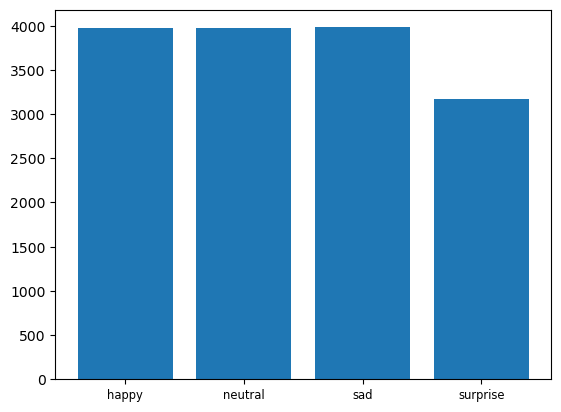

In [44]:
df = pd.Series(expression_train_data)
plt.bar(range(len(df)), df.values, align = 'center')
plt.xticks(range(len(df)), df.index.values, size = 'small')
plt.show()

**Observations and Insights:__**

**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [101]:
tf.keras.backend.clear_session()

In [102]:
np.random.seed(42)
import random
random.seed(20)
tf.random.set_seed(20)

In [103]:
def get_data_set(folder_path, mode, batch_size, img_size):
    image_data = tf_utils.image_dataset_from_directory(folder_path,
                                       image_size = (img_size, img_size),
                                       color_mode = mode,
                                       batch_size = batch_size,
                                       label_mode = 'categorical',
                                       shuffle = True)
    
    return image_data

In [289]:
data_labels = ['happy', 'neutral', 'sad', 'surprise']

In [165]:
def show_image_data_set(image_data_set: tf.data.Dataset):
    total_count = 0
    for img_batch, label_batch in image_data_set:
        print(img_batch.shape)
        print(label_batch.shape)
        total_count += img_batch.shape[0]
    print("Total entry count: ", total_count)

In [211]:
def show_tf_dataset_image(image_data, encode_label=None):
    expressions = ['happy', 'neutral', 'sad', 'surprise']
    plt.figure(figsize = (4, 4))
    plt.imshow(image_data.numpy().astype("uint8"), cmap = "gray")
    plt.title(expressions[int(np.argmax(encode_label))])
    plt.show()

In [104]:
training_data = get_data_set(folder_path + "train/", 'grayscale', 32, 48)
print(training_data)

Found 15109 files belonging to 4 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>


In [ ]:
show_image_data_set(training_data)

In [141]:
training_data.class_names

['happy', 'neutral', 'sad', 'surprise']

In [105]:
validation_data = get_data_set(folder_path + "validation/", 'grayscale', 32, 48)

Found 4977 files belonging to 4 classes.


In [142]:
validation_data.class_names

['happy', 'neutral', 'sad', 'surprise']

In [106]:
testing_data = get_data_set(folder_path + "test/", 'grayscale', 32, 48)

Found 128 files belonging to 4 classes.


In [151]:
print(testing_data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>


In [225]:
testing_label_decoded = np.zeros((128,), dtype='int32')
iter = 0
for image_batch, label_batch in testing_data:
    for label in label_batch:
        testing_label_decoded[iter] = np.argmax(label)
        iter += 1

print(testing_label_decoded)
testing_label_decoded.shape

[0 1 1 0 1 1 2 0 0 2 0 2 1 0 0 3 3 2 0 0 2 1 2 1 2 2 3 2 1 2 0 0 0 3 3 3 1
 1 1 2 2 0 1 3 3 1 2 1 2 2 1 3 1 2 3 3 2 0 3 3 2 1 3 3 0 3 2 0 0 3 0 2 3 1
 1 0 2 1 1 0 1 3 0 0 0 1 3 3 0 0 1 1 2 3 2 3 2 2 2 3 0 0 0 3 3 1 2 0 3 2 3
 0 1 1 2 2 1 3 1 3 0 1 3 2 0 2 1 3]


(128,)

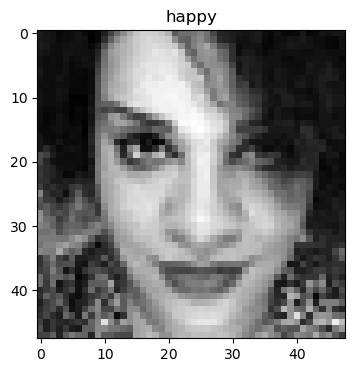

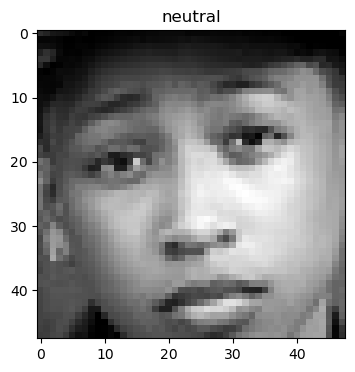

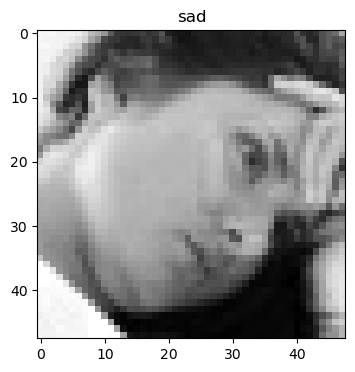

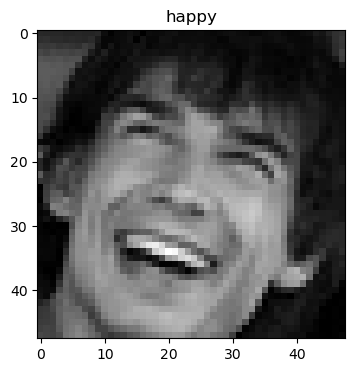

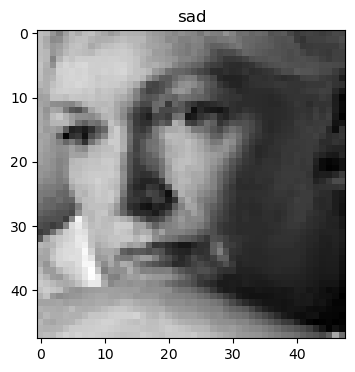

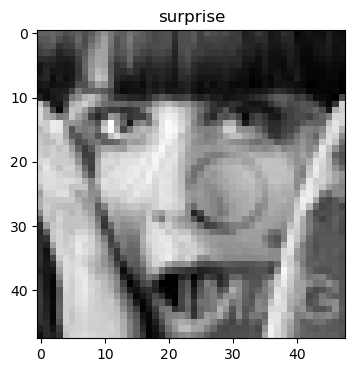

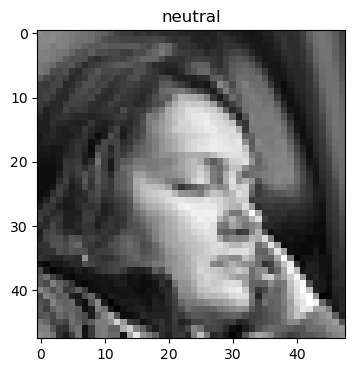

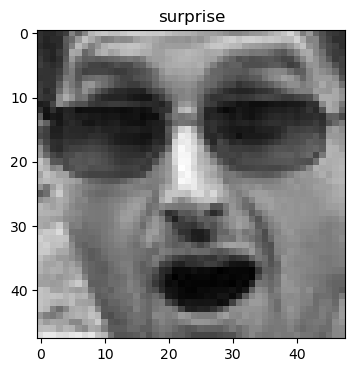

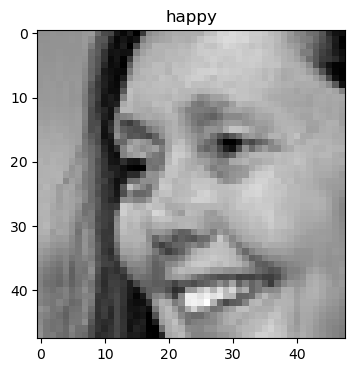

1


In [220]:
ran_count = 0
for images, labels in training_data.take(1):
    for i in range(9):
        show_tf_dataset_image(images[i], labels[i])
    ran_count += 1
    break;

print(ran_count)

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [107]:
# Initializing a Sequential Model
model = Sequential()

# Add the first Convolutional block
model.add(Conv2D(filters = 64, kernel_size = (2, 2), padding = "same", input_shape = (48, 48, 1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Add the second Convolutional block
model.add(Conv2D(filters = 32, kernel_size = (2, 2), padding = "same", input_shape = (48, 48, 1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Add the third Convolutional block
model.add(Conv2D(filters = 32, kernel_size = (2, 2), padding = "same", input_shape = (48, 48, 1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Add the Flatten layer
model.add(Flatten())

# Add the first Dense layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

# Add the Final layer
model.add(Dense(4, activation='softmax'))
model.summary()

c:\Users\amit_\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,060 (2.31 MB)

 Trainable params: 605,060 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

### **Compiling and Training the Model**

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model_file = os.path.abspath(out_directory + "/model_1_epoch_{epoch}max_accuracy.keras")
max_accuracy = ModelCheckpoint( model_file,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True,
                                mode='max')

early_stopping = EarlyStopping( monitor = 'val_loss',
                                min_delta = 0,
                                patience = 3,
                                verbose = 1,
                                restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [early_stopping, max_accuracy, reduce_learningrate]

In [132]:
epochs = 20
history = model.fit(training_data, validation_data = validation_data, epochs = epochs, callbacks = callbacks_list)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4375 - loss: 1.2408
Epoch 1: val_accuracy improved from -inf to 0.50171, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_1_epoch_1max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.4375 - loss: 1.2407 - val_accuracy: 0.5017 - val_loss: 1.1634 - learning_rate: 0.0010
Epoch 2/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4818 - loss: 1.1807
Epoch 2: val_accuracy improved from 0.50171 to 0.52763, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_1_epoch_2max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.4818 - loss: 1.1806 - val_accuracy: 0.5276 - val_loss: 1.1109 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5158 - loss: 1.1116
Epoch 3: val_accuracy improved from 0.52763 to 0.57685, saving model to D:\GitHub\amitprakash07\snowflake\

### **Evaluating the Model on the Test Set**

In [133]:
accuracy = model.evaluate(testing_data, verbose=2)

4/4 - 0s - 89ms/step - accuracy: 0.6797 - loss: 0.7967


In [134]:
model_predictions = model.predict(testing_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step 


In [135]:
model_predictions.shape

(128, 4)

In [136]:
model_predictions

array([[2.22477227e-01, 5.13243914e-01, 2.20075071e-01, 4.42038104e-02],
       [2.35002227e-02, 7.28567019e-02, 8.82589042e-01, 2.10540630e-02],
       [2.24717170e-01, 3.70370209e-01, 4.00655150e-01, 4.25753323e-03],
       [9.93248424e-04, 5.40472427e-03, 4.76109469e-03, 9.88840878e-01],
       [3.26299369e-01, 3.30387443e-01, 3.26998144e-01, 1.63150392e-02],
       [2.71358877e-01, 4.07825798e-01, 2.51606137e-01, 6.92092180e-02],
       [8.38884432e-03, 4.23927139e-03, 1.54910388e-03, 9.85822856e-01],
       [3.03047836e-01, 1.53407246e-01, 1.80792883e-01, 3.62751991e-01],
       [3.93171161e-02, 4.26224977e-01, 5.14655173e-01, 1.98026691e-02],
       [3.39748770e-01, 1.73726037e-01, 2.93399066e-01, 1.93126157e-01],
       [1.51405841e-01, 4.37805533e-01, 4.07215208e-01, 3.57337669e-03],
       [2.48065982e-02, 6.19524300e-01, 3.04129899e-01, 5.15391678e-02],
       [9.76110995e-01, 1.16151972e-02, 4.48830286e-03, 7.78553402e-03],
       [2.30413470e-02, 8.38086382e-03, 1.41947176e

In [137]:
y_pred_arg=np.argmax(model_predictions,axis=1)

In [138]:
y_pred_arg.shape

(128,)

In [139]:
y_pred_arg 

array([1, 2, 2, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0, 3, 1, 3, 2, 0, 1, 3, 2, 2,
       0, 2, 1, 0, 2, 0, 1, 3, 3, 0, 1, 2, 2, 3, 1, 2, 1, 1, 3, 1, 0, 2,
       2, 2, 1, 0, 0, 3, 3, 1, 0, 1, 1, 3, 2, 1, 2, 0, 2, 3, 2, 1, 2, 0,
       0, 2, 0, 1, 2, 3, 1, 1, 2, 3, 2, 1, 1, 3, 0, 3, 3, 2, 1, 2, 1, 1,
       0, 0, 0, 3, 3, 1, 0, 2, 3, 0, 0, 2, 3, 1, 0, 1, 1, 2, 3, 1, 0, 2,
       2, 0, 2, 2, 0, 1, 3, 0, 1, 0, 0, 3, 3, 1, 1, 3, 1, 0], dtype=int64)

In [221]:
type(y_pred_arg)

numpy.ndarray

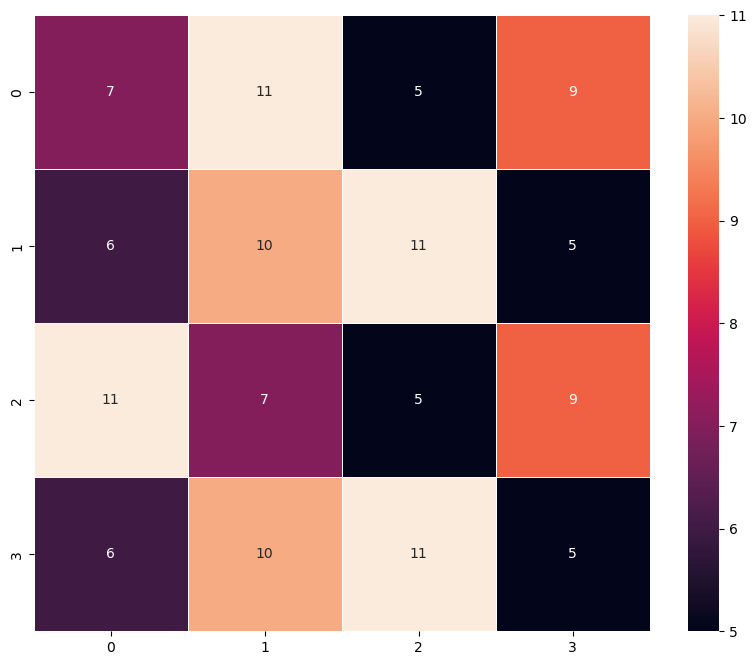

In [226]:
import tensorflow.math as tf_math

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix_out = tf_math.confusion_matrix(testing_label_decoded,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_out,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observations and Insights:__**

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [227]:
tf.keras.backend.clear_session()

In [228]:
np.random.seed(42)
import random
random.seed(20)
tf.random.set_seed(20)

In [231]:
# Initializing a Sequential Model
model_2 = Sequential()

# Add the first Convolutional block
model_2.add(Conv2D(filters = 256, kernel_size = (2, 2), padding = "same", input_shape = (48, 48, 1), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))
model_2.add(MaxPooling2D(pool_size = (2, 2)))

# Add the second Convolutional block
model_2.add(Conv2D(filters = 128, kernel_size = (2, 2), padding = "same", activation='relu'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))
model_2.add(MaxPooling2D(pool_size = (2, 2)))

# Add the third Convolutional block
model_2.add(Conv2D(filters = 64, kernel_size = (2, 2), padding = "same", activation='relu'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))
model_2.add(MaxPooling2D(pool_size = (2, 2)))

# Add the fourth Convolutional block
model_2.add(Conv2D(filters = 32, kernel_size = (2, 2)))

# Add the Flatten layer
model_2.add(Flatten())

# Add the first Dense layer
model_2.add(Dense(512, activation='relu'))

# Dense layer
model_2.add(Dense(128, activation='relu'))

# Add the Final layer
model_2.add(Dense(4, activation='softmax'))
model_2.summary()

c:\Users\amit_\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 256)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 5, 5, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       410,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651,620 (2.49 MB)

 Trainable params: 650,724 (2.48 MB)

 Non-trainable params: 896 (3.50 KB)

### **Compiling and Training the Model**

In [232]:
model_2.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [233]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model_2_file = os.path.abspath(out_directory + "/model_2_epoch_{epoch}max_accuracy.keras")
max_accuracy = ModelCheckpoint( model_2_file,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True,
                                mode='max')

early_stopping = EarlyStopping( monitor = 'val_loss',
                                min_delta = 0,
                                patience = 3,
                                verbose = 1,
                                restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [early_stopping, max_accuracy, reduce_learningrate]

In [235]:
epochs = 20
history = model_2.fit(training_data, validation_data = validation_data, epochs = epochs, callbacks = callbacks_list)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.4700 - loss: 1.2365
Epoch 1: val_accuracy improved from -inf to 0.58328, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_2_epoch_1max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 256s 477ms/step - accuracy: 0.4702 - loss: 1.2361 - val_accuracy: 0.5833 - val_loss: 1.0044 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.6214 - loss: 0.8925
Epoch 2: val_accuracy did not improve from 0.58328
473/473 ━━━━━━━━━━━━━━━━━━━━ 189s 400ms/step - accuracy: 0.6214 - loss: 0.8924 - val_accuracy: 0.5590 - val_loss: 1.0303 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.6734 - loss: 0.7688
Epoch 3: val_accuracy improved from 0.58328 to 0.64436, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_2_epoch_3max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 193s 409ms/step - a

### **Evaluating the Model on the Test Set**

In [238]:
accuracy = model_2.evaluate(testing_data, verbose=2)

4/4 - 0s - 97ms/step - accuracy: 0.6094 - loss: 0.8819


In [239]:
model_predictions = model_2.predict(testing_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


In [240]:
y_pred_arg=np.argmax(model_predictions, axis=1)

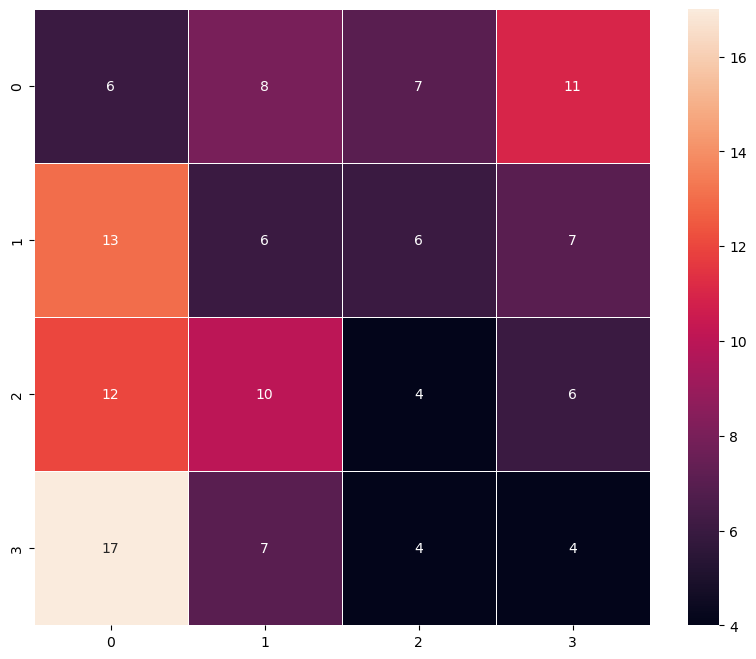

In [241]:
import tensorflow.math as tf_math

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix_out = tf_math.confusion_matrix(testing_label_decoded,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_out,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Same model with RGB

In [266]:
tf.keras.backend.clear_session()

np.random.seed(42)
import random
random.seed(20)
tf.random.set_seed(20)

In [267]:
## Gather RGB dataset
rgb_training_data = get_data_set(folder_path + "train/", 'rgb', 32, 48)
rgb_test_data = get_data_set(folder_path + "test/", 'rgb', 32, 48)
rgb_validation_data = get_data_set(folder_path + "validation/", 'rgb', 32, 48)

Found 15109 files belonging to 4 classes.
Found 128 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.


In [276]:
rgb_testing_label_decoded = np.zeros((128,), dtype='int32')
iter = 0
for image_batch, label_batch in rgb_test_data:
    for label in label_batch:
        rgb_testing_label_decoded[iter] = np.argmax(label)
        iter += 1

print(rgb_testing_label_decoded)
rgb_testing_label_decoded.shape

[3 0 2 1 0 2 3 3 0 3 0 3 2 0 3 1 3 0 3 2 3 1 0 2 0 0 3 2 0 2 3 3 2 1 0 3 2
 0 0 2 2 1 1 0 0 1 0 1 0 1 2 1 3 1 3 3 1 0 3 1 3 1 1 1 3 0 2 2 1 2 2 3 1 1
 2 1 3 1 2 0 0 3 3 3 0 2 0 1 1 0 0 2 2 2 1 1 2 3 2 2 1 0 0 0 1 0 3 3 0 1 1
 3 3 2 2 2 2 2 3 1 0 3 0 1 2 1 2 3]


(128,)

In [259]:
show_image_data_set(rgb_training_data)

(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)


In [272]:
# Initializing a Sequential Model
model_2_with_rgb = Sequential()

# Add the first Convolutional block
model_2_with_rgb.add(tf.keras.layers.Rescaling(1./255, input_shape = (48, 48, 3)))
model_2_with_rgb.add(Conv2D(filters = 256, kernel_size = (2, 2), padding = "same", input_shape = (48, 48, 3), activation='relu'))
model_2_with_rgb.add(BatchNormalization())
model_2_with_rgb.add(LeakyReLU(0.1))
model_2_with_rgb.add(MaxPooling2D(pool_size = (2, 2)))

# Add the second Convolutional block
model_2_with_rgb.add(Conv2D(filters = 128, kernel_size = (2, 2), padding = "same", activation='relu'))
model_2_with_rgb.add(BatchNormalization())
model_2_with_rgb.add(LeakyReLU(0.1))
model_2_with_rgb.add(MaxPooling2D(pool_size = (2, 2)))

# Add the third Convolutional block
model_2_with_rgb.add(Conv2D(filters = 64, kernel_size = (2, 2), padding = "same", activation='relu'))
model_2_with_rgb.add(BatchNormalization())
model_2_with_rgb.add(LeakyReLU(0.1))
model_2_with_rgb.add(MaxPooling2D(pool_size = (2, 2)))

# Add the fourth Convolutional block
model_2_with_rgb.add(Conv2D(filters = 32, kernel_size = (2, 2)))

# Add the Flatten layer
model_2_with_rgb.add(Flatten())

# Add the first Dense layer
model_2_with_rgb.add(Dense(512, activation='relu'))

# Dense layer
model_2_with_rgb.add(Dense(128, activation='relu'))

# Add the Final layer
model_2_with_rgb.add(Dense(4, activation='softmax'))
model_2_with_rgb.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 256)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 5, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       410,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 653,668 (2.49 MB)

 Trainable params: 652,772 (2.49 MB)

 Non-trainable params: 896 (3.50 KB)

In [273]:
model_2_with_rgb.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [274]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model_2_rgb_file = os.path.abspath(out_directory + "/model_2_rgb_epoch_{epoch}_max_accuracy.keras")
max_accuracy = ModelCheckpoint( model_2_rgb_file,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True,
                                mode='max')

early_stopping = EarlyStopping( monitor = 'val_loss',
                                min_delta = 0,
                                patience = 3,
                                verbose = 1,
                                restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [early_stopping, max_accuracy, reduce_learningrate]

In [275]:
epochs = 20
history = model_2_with_rgb.fit(rgb_training_data, validation_data = rgb_validation_data, epochs = epochs, callbacks = callbacks_list)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.4688 - loss: 1.2450
Epoch 1: val_accuracy improved from -inf to 0.45489, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_2_rgb_epoch_1_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 209s 399ms/step - accuracy: 0.4690 - loss: 1.2446 - val_accuracy: 0.4549 - val_loss: 1.1779 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.6222 - loss: 0.8977
Epoch 2: val_accuracy improved from 0.45489 to 0.58951, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_2_rgb_epoch_2_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 183s 386ms/step - accuracy: 0.6222 - loss: 0.8977 - val_accuracy: 0.5895 - val_loss: 0.9666 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.6759 - loss: 0.7650
Epoch 3: val_accuracy improved from 0.58951 to 0.62327, saving model to D:\GitHub\amitpra

## Model Evaluation with RGB data

In [277]:
accuracy = model_2_with_rgb.evaluate(rgb_test_data, verbose=2)

4/4 - 0s - 88ms/step - accuracy: 0.6094 - loss: 0.8706


In [278]:
model_predictions = model_2_with_rgb.predict(rgb_test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


In [279]:
y_pred_arg=np.argmax(model_predictions, axis=1)

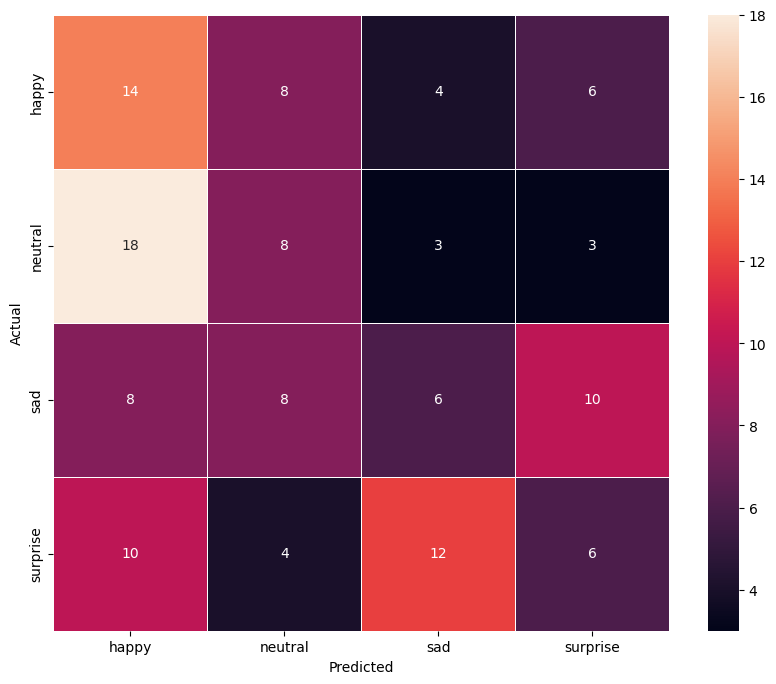

In [290]:
import tensorflow.math as tf_math

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix_out = tf_math.confusion_matrix(rgb_testing_label_decoded,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_out,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=data_labels,
    yticklabels=data_labels
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:__**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [291]:

## Transfer learning (tl) data sets
tl_training_data = get_data_set(folder_path + "train/", 'rgb', 32, 48)
tl_test_data = get_data_set(folder_path + "test/", 'rgb', 32, 48)
tl_validation_data = get_data_set(folder_path + "validation/", 'rgb', 32, 48)

Found 15109 files belonging to 4 classes.
Found 128 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.


In [292]:
tl_testing_label_decoded = np.zeros((128,), dtype='int32')
iter = 0
for image_batch, label_batch in tl_test_data:
    for label in label_batch:
        tl_testing_label_decoded[iter] = np.argmax(label)
        iter += 1

print(tl_testing_label_decoded)
tl_testing_label_decoded.shape

[1 2 2 2 0 3 2 0 3 3 2 1 3 2 3 2 3 1 1 0 2 3 0 2 1 3 0 0 1 1 2 1 0 1 3 0 1
 2 3 3 1 2 2 2 3 2 1 2 0 1 2 0 1 0 3 0 3 2 0 2 2 1 1 2 0 3 1 3 2 2 3 2 3 3
 0 0 2 0 3 0 3 3 0 3 3 3 1 0 1 3 2 2 1 0 1 3 2 2 1 3 1 3 0 1 0 0 1 1 0 0 1
 1 2 0 0 0 1 0 0 3 2 1 0 3 1 3 1 2]


(128,)

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [299]:
tf.keras.backend.clear_session()

In [300]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [301]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [302]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

x = Flatten()(transfer_layer.output)

x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

vgg_transfer_model = Model(vgg.input, pred)

### **Compiling and Training the VGG16 Model**

In [303]:
vgg_transfer_model.compile(optimizer = Adam(learning_rate = 0.001),
                           loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [304]:
vgg_transfer_model_file = os.path.abspath(out_directory + "/vgg_transfer_model{epoch}_max_accuracy.keras")
checkpoint = ModelCheckpoint(vgg_transfer_model_file, 
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

In [305]:
epochs = 20
vgg_model_history = vgg_transfer_model.fit(tl_training_data,
                                         validation_data = tl_validation_data,
                                         epochs = epochs,
                                         callbacks = callbacks_list)

Epoch 1/20
199/473 ━━━━━━━━━━━━━━━━━━━━ 1:14 274ms/step - accuracy: 0.3692 - loss: 1.4741

KeyboardInterrupt: 

### **Evaluating the VGG16 model**

**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the Model**

### **Evaluating the ResNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the Model**

### **Evaluating the EfficientnetNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

### **Compiling and Training the Model**

### **Evaluating the Model on Test Set**

**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

**Observations and Insights:__**

## **Conclusion:____________**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?